In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
data = pd.read_csv("/Users/rohini/Downloads/listings_airbnb.csv")
data.head(1)

/Users/rohini/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12


# DATA UNDERSTANDING AND CLEANING

In [2]:
data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.067700e+04,2.067700e+04,0.0,0.0,0.0,2.067700e+04,0.0,20665.000000,20665.000000,0.0,...,17852.000000,17840.000000,17847.000000,17842.000000,17842.000000,20677.000000,20677.000000,20677.000000,20677.000000,18084.000000
mean,1.791013e+07,2.019081e+13,NaN,NaN,NaN,5.666981e+07,NaN,7.010888,7.010888,NaN,...,9.469079,9.735762,9.789488,9.476124,9.177054,4.925134,4.492431,0.410988,0.021715,0.987736
std,1.041987e+07,7.800970e+00,NaN,NaN,NaN,6.812902e+07,NaN,37.729548,37.729548,NaN,...,0.867372,0.654358,0.610074,0.707655,0.808275,22.883678,22.710906,1.082794,0.237805,1.349155
min,2.818000e+03,2.019081e+13,NaN,NaN,NaN,3.159000e+03,NaN,0.000000,0.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.340207e+06,2.019081e+13,NaN,NaN,NaN,8.795077e+06,NaN,1.000000,1.000000,NaN,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.240000
50%,1.774427e+07,2.019081e+13,NaN,NaN,NaN,2.618942e+07,NaN,1.000000,1.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.540000
75%,2.601974e+07,2.019081e+13,NaN,NaN,NaN,7.754037e+07,NaN,2.000000,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,1.070000
max,3.759099e+07,2.019081e+13,NaN,NaN,NaN,2.839422e+08,NaN,980.000000,980.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,10.000000,208.000000,206.000000,15.000000,8.000000,33.670000


## Feature Selection 

There are few features that we can drop as we don't need those features in the analysis as of now . These features include urls, notes, iteraction( NLP is not required in the current analysis process) , hostname  . Manually editing the columns list to drop these columns and listing out those columns that are needed.

In [3]:
# only keep the following features in the dataset
cols = ['id', 'host_id', 'host_since', 'last_scraped', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
             'host_is_superhost', \
             'host_identity_verified', 'neighbourhood_cleansed', 'city', 'neighbourhood_group_cleansed', \
             'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', \
             'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', \
             'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', \
             'minimum_nights', 'maximum_nights', 'has_availability', 'availability_365', 'number_of_reviews', \
             'first_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', \
             'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'requires_license', \
             'license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', \
             'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month']
cleaned_data = data[cols]

print(len(cleaned_data.columns))

50


#### Variables Explanation and Analysis

Host related information: host_id, host_identity_verified.

Host experience: host_is_superhost, calculated_host_listings_count, host_since

Host service : host_response_time, host_response_rate, host_acceptance_rate, etc.

Listing information : id, amenities, room_type, neighbourhood, homestay policy, etc.

Listing reviews/ratings : number_of_reviews, reviews_per_month, review_scores_rating, etc.

#### Excluding the listings/entries with missing data  as it will not add any value to the analysis.

In [4]:
#exclude the listings with 0 for price,beds,bedrooms,accomodates
cleaned_data = cleaned_data[cleaned_data.bathrooms >0]
cleaned_data = cleaned_data[cleaned_data.bedrooms > 0]
cleaned_data = cleaned_data[cleaned_data.beds > 0]
cleaned_data = cleaned_data[cleaned_data.review_scores_rating  > 0]
cleaned_data = cleaned_data[cleaned_data.reviews_per_month > 0]
cleaned_data = cleaned_data[cleaned_data.accommodates  > 0]
cleaned_data.head(2)

,id,host_id,host_since,last_scraped,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,...,review_scores_communication,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,3159,2008-09-24,2019-08-09,within an hour,100%,NaN,t,f,Oostelijk Havengebied - Indische Buurt,...,10.0,10.0,f,NaN,t,strict_14_with_grace_period,f,f,1,2.12
1,20168,59484,2009-12-02,2019-08-09,within an hour,100%,NaN,f,f,Centrum-Oost,...,10.0,9.0,f,NaN,f,strict_14_with_grace_period,f,f,2,2.46


#### Columns with missing values : Drop the columns having all the missing values as it is of no use . 

neighbourhood_group_cleansed    1.000000
host_acceptance_rate            1.000000
license                         0.999524
square_feet                     0.978113
monthly_price                   0.924230
weekly_price                    0.860354
host_response_time              0.395980
host_response_rate              0.395980
security_deposit                0.268883
cleaning_fee                    0.145236
dtype: float64

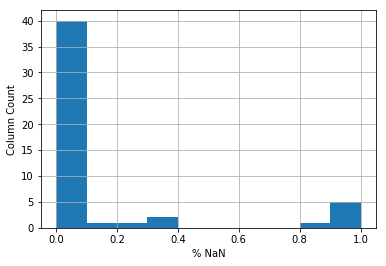

In [5]:
nan_cols = (cleaned_data.isnull().sum()/cleaned_data.shape[0]).sort_values(ascending = False)
ax = nan_cols.hist()  
ax.set_xlabel("% NaN")
ax.set_ylabel("Column Count")
nan_cols.head(n=10)

In [6]:
# drop columns with NaN values
cleaned_data = cleaned_data.drop(labels = ['license', 'square_feet', 'monthly_price', 'weekly_price', \
                                           'has_availability', 'neighbourhood_group_cleansed',\
                                           'host_acceptance_rate','host_response_time','host_response_rate',\
                                          'security_deposit','cleaning_fee'], axis = 1)

In [7]:
room_type_df = cleaned_data.groupby('room_type').id.count()
room_type_df = room_type_df.reset_index()
room_type_df = room_type_df.rename(columns={'id': 'number_of_listings'})
room_type_df

,room_type,number_of_listings
0,Entire home/apt,13391
1,Private room,3357
2,Shared room,66


In [8]:
cleaned_data.price = cleaned_data.price.str.lstrip('$').str.replace(',', '')
cleaned_data.price = cleaned_data.price.astype('float')

In [9]:
# Average prices for each type of listing

avgPrice=cleaned_data.groupby('room_type').price.mean()
avgPrice=avgPrice.reset_index()
avgPrice=avgPrice.rename(columns={'price':'average_Price'})
avgPrice

,room_type,average_Price
0,Entire home/apt,168.508476
1,Private room,103.831099
2,Shared room,180.287879


# Analysis - 1 


### Case study : Where to invest in airbnb property and what type of property to invest in (Amesterdam) to get maximum profit ? 

#### Case 1: It can be seen below with the analysis that people prefer renting entire home/apartment instead of a shared room and this room type is expensive over other type of rooms.  

As per the data , renting frequency of entire apartment/house is maximum than other property type. Investing in that would be more profitable considering the average renting price and average renting frequency.





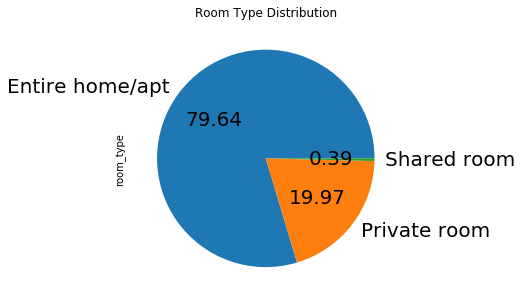

In [10]:
import matplotlib
import matplotlib.pyplot as plt
room_type_count = cleaned_data.room_type.value_counts()
room_type_count.plot.pie(figsize=(5, 5), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');

In [11]:
cleaned_data = cleaned_data[cleaned_data.property_type != 0]
# number of listings based on the property type
property_type_count = cleaned_data.property_type.value_counts()

property_type_count

Apartment                 13009
House                      1325
Townhouse                   546
Bed and breakfast           428
Loft                        323
Boat                        284
Condominium                 247
Houseboat                   245
Guest suite                 110
Aparthotel                   55
Serviced apartment           46
Guesthouse                   35
Villa                        33
Boutique hotel               31
Other                        23
Hostel                       19
Hotel                        14
Cottage                       9
Tiny house                    8
Cabin                         6
Bungalow                      3
Barn                          2
Chalet                        2
Casa particular (Cuba)        2
Dome house                    1
Tent                          1
Camper/RV                     1
Nature lodge                  1
Castle                        1
Earth house                   1
Campsite                      1
Lighthou

### Conclusion 1 : As per the listing , avg listing price and frequency of renting it is evident that renting entire apartment and house would be considered as a good investment.

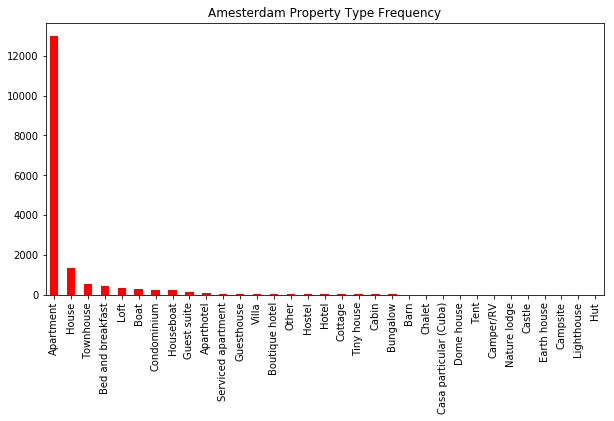

In [12]:

import matplotlib.pyplot as plt 

property_type_count.plot.bar(color = 'red', figsize =(10,5), title = 'Amesterdam Property Type Frequency')
plt.xlabel="Property type"
plt.ylabel="Number of listings"


### Conclusion 2 : Below graph shows that neighbourhood with the maximum mean prices are Centrum-Oost and Centrum-West . Having an entire apartment rented in these areas would give maximum profit.

In [13]:

# average price of listings w.r.t neighbourhood
price_per_neighbourhood = cleaned_data.groupby('neighbourhood_cleansed').price.mean()


price_per_neighbourhood

neighbourhood_cleansed
Bijlmer-Centrum                            98.746479
Bijlmer-Oost                               88.797872
Bos en Lommer                             122.192857
Buitenveldert - Zuidas                    143.175258
Centrum-Oost                              188.521429
Centrum-West                              198.306762
De Aker - Nieuw Sloten                    124.954955
De Baarsjes - Oud-West                    147.461718
De Pijp - Rivierenbuurt                   162.945342
Gaasperdam - Driemond                      96.371901
Geuzenveld - Slotermeer                   112.426136
IJburg - Zeeburgereiland                  163.473822
Noord-Oost                                120.982684
Noord-West                                126.418367
Oostelijk Havengebied - Indische Buurt    132.797834
Osdorp                                     99.081301
Oud-Noord                                 161.795635
Oud-Oost                                  143.519720
Slotervaart            

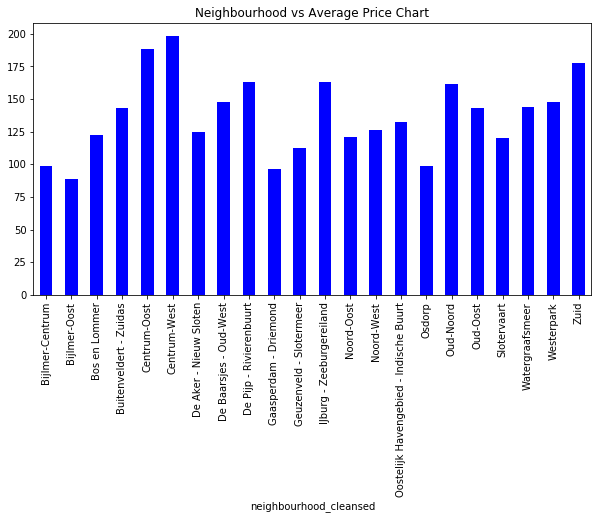

In [14]:
# plot a graph that depicts a relation between neighbourhood and price
price_per_neighbourhood.plot.bar(color = 'blue', figsize =(10,5), title = 'Neighbourhood vs Average Price Chart')

plt.xlabel='Neighbourhoods'
plt.ylabel='Average Price'

In [15]:
home = cleaned_data[(cleaned_data.room_type == 'Entire home/apt')]

# grouping neighbourhood by number of listings

neighbourhood_DF=home.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

,neighbourhood_cleansed,Number_Of_Listings
7,De Baarsjes - Oud-West,2530
8,De Pijp - Rivierenbuurt,1787
5,Centrum-West,1302
20,Westerpark,1146
4,Centrum-Oost,1060


In [16]:

# grouping neighbourhood by average price of listings

neighbourhoodPrice_DF=home.groupby('neighbourhood_cleansed').price.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()

,neighbourhood_cleansed,Average_Price
5,Centrum-West,220.523810
4,Centrum-Oost,206.152830
21,Zuid,188.914172
11,IJburg - Zeeburgereiland,184.270548
8,De Pijp - Rivierenbuurt,173.440963


In [17]:
#Merging above two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()

,neighbourhood_cleansed,Number_Of_Listings,Average_Price
0,De Baarsjes - Oud-West,2530,157.592490
1,De Pijp - Rivierenbuurt,1787,173.440963
2,Centrum-West,1302,220.523810
3,Westerpark,1146,155.002618
4,Centrum-Oost,1060,206.152830


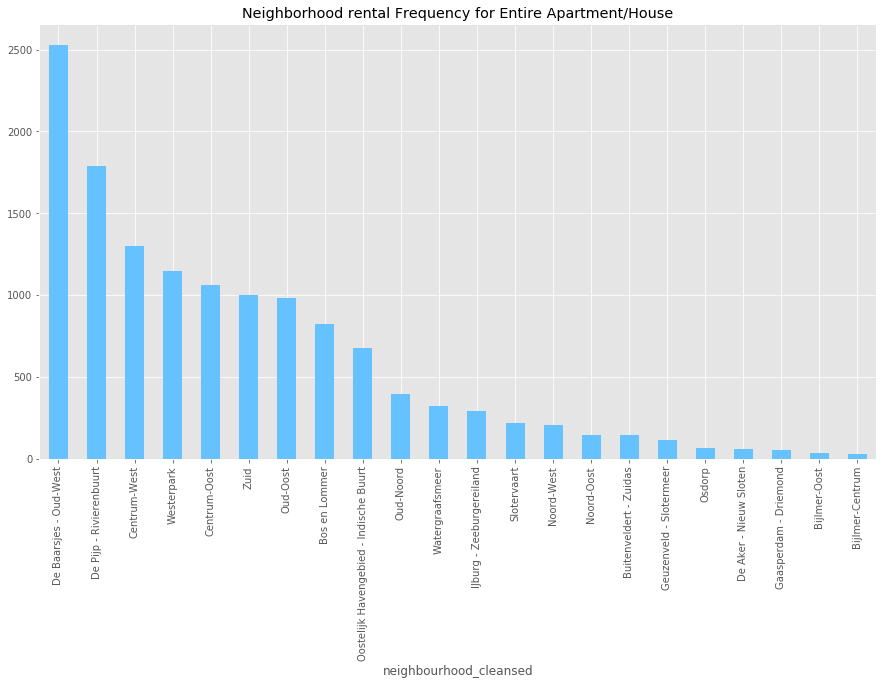

In [18]:
# visualizing the frequency of listings on the basis of neighbourhood where room type is entire apartment

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Neighborhood rental Frequency for Entire Apartment/House', 
           legend = False)


In [19]:
cleaned_data.select_dtypes(include=['object']).columns

Index(['host_since', 'last_scraped', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'city',
       'property_type', 'room_type', 'bed_type', 'amenities', 'extra_people',
       'first_review', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [20]:
cleaned_data.select_dtypes(include=['float64']).columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'price',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_value',
       'reviews_per_month'],
      dtype='object')

# Analysis - 2 : Season vs Price -  How season affects Rental prices of the property.

In [21]:
calendar_data = pd.read_csv("/Users/rohini/Downloads/calendar.csv")
calendar_data.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2818,2019-12-08,f,$51.00,$51.00,3.0,1125.0
1,58211,2019-12-08,t,$175.00,$175.00,3.0,365.0
2,58211,2019-12-09,t,$175.00,$175.00,3.0,365.0
3,58211,2019-12-10,t,$175.00,$175.00,2.0,365.0
4,58211,2019-12-11,t,$175.00,$175.00,2.0,365.0


In [22]:
calendar_data.price = calendar_data.price.str.lstrip('$').str.replace(',', '')
calendar_data.price = calendar_data.price.astype('float')

calendar_data.adjusted_price = calendar_data.adjusted_price.str.lstrip('$').str.replace(',', '')
calendar_data.adjusted_price = calendar_data.adjusted_price.astype('float')

In [23]:
calendar_data.price.head(5)

0     51.0
1    175.0
2    175.0
3    175.0
4    175.0
Name: price, dtype: float64

In [24]:
#separating date column into day month and year
calendar_data['Year'],calendar_data['Month'],calendar_data['Day']=calendar_data['date'].str.split('-',2).str
calendar_data.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Year,Month,Day
0,2818,2019-12-08,f,51.0,51.0,3.0,1125.0,2019,12,08
1,58211,2019-12-08,t,175.0,175.0,3.0,365.0,2019,12,08
2,58211,2019-12-09,t,175.0,175.0,3.0,365.0,2019,12,09
3,58211,2019-12-10,t,175.0,175.0,2.0,365.0,2019,12,10
4,58211,2019-12-11,t,175.0,175.0,2.0,365.0,2019,12,11


In [25]:

year_data=calendar_data.groupby(['Year','Month']).price.mean()

year_data.head(15)

Year  Month
2019  12       165.688095
2020  01       163.038946
      02       162.969920
      03       164.983326
      04       170.557936
      05       172.921901
      06       171.377884
      07       170.673381
      08       170.965564
      09       171.480072
      10       171.658669
      11       170.552353
      12       170.582267
Name: price, dtype: float64

## As per the plot (year-Month vs price) -  The prices are maximum during May and June but it seems like there is not much difference in the prices all around the year as it is a popular tourist place. 

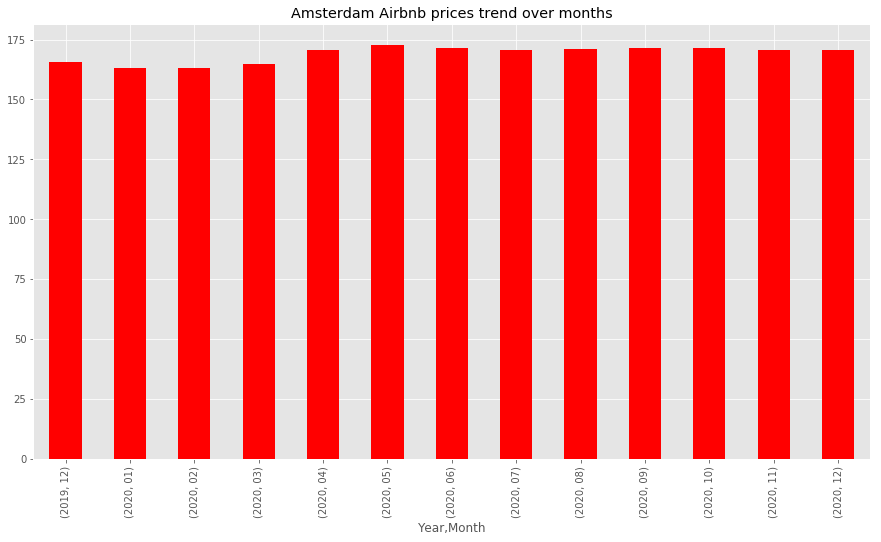

In [26]:
# visualizing the trend of year/Month and average prices of the listing

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


year_data.plot(kind='bar', 
           x='year-Month',
           y='price',
           color = 'red', 
           figsize =(15,8), 
           title = 'Amsterdam Airbnb prices trend over months', 
           legend = False)
#plt.ylabel('Average Price')

# Analysis - 3 : Cleaning data and applying different Machine Learning algorithmns

In [27]:
print(len(cleaned_data.columns))
cleaned_data.columns

39


Index(['id', 'host_id', 'host_since', 'last_scraped', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

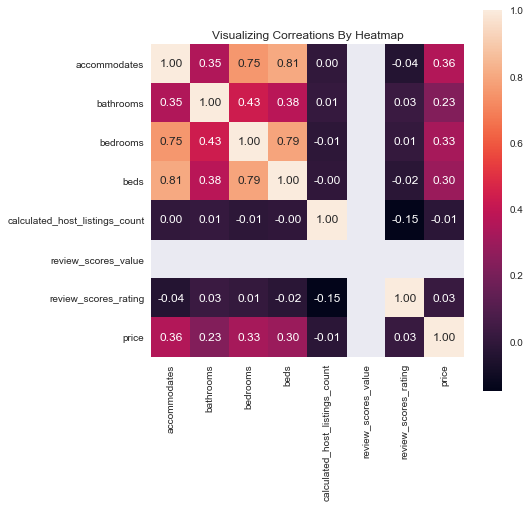

In [28]:
#Now get the coulumn that are used for correlation
Correlation_columns = ['accommodates','bathrooms','bedrooms','beds',
        'calculated_host_listings_count','review_scores_value',
        'review_scores_rating', 'price']

#correlation between columns 
coffecient_corr = np.corrcoef(cleaned_data[Correlation_columns].values.T)
#Heatmap
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
heatmap_fig=sns.heatmap(coffecient_corr, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = Correlation_columns, xticklabels = Correlation_columns).set_title('Visualizing Correations By Heatmap')

fig = heatmap_fig.get_figure()
fig.savefig('correlations.png')

In [29]:
cleaned_data.columns


Index(['id', 'host_id', 'host_since', 'last_scraped', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed', 'city', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

### Host Name , Lastscraped columns are date columns as of now we do not need them . Dropping these columns.

In [30]:
cleaned_data=cleaned_data.drop(labels = ['last_scraped','host_since'],axis=1)
cleaned_data.columns

Index(['id', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

# One Hot Encoding with Categorical Values 

In [31]:
categorical_features=['host_is_superhost',
                     'host_identity_verified',
                     'property_type',
                     'room_type',
                     'bed_type',
                     'requires_license',
                     'instant_bookable',
                     'cancellation_policy',
                     'require_guest_profile_picture',
                     'require_guest_phone_verification']

cleaned_data[categorical_features].dtypes

host_is_superhost                   object
host_identity_verified              object
property_type                       object
room_type                           object
bed_type                            object
requires_license                    object
instant_bookable                    object
cancellation_policy                 object
require_guest_profile_picture       object
require_guest_phone_verification    object
dtype: object

## Converting feature dtypes to category  

In [32]:
cleaned_data[categorical_features] = cleaned_data[categorical_features].apply(lambda x: x.astype('category'),
                                                                                axis='rows')
cleaned_data[categorical_features].dtypes

host_is_superhost                   category
host_identity_verified              category
property_type                       category
room_type                           category
bed_type                            category
requires_license                    category
instant_bookable                    category
cancellation_policy                 category
require_guest_profile_picture       category
require_guest_phone_verification    category
dtype: object

## Identifying Unique values in each feature

In [33]:
num_unique_values = cleaned_data[categorical_features].apply(pd.Series.nunique, axis='rows')
print(num_unique_values)



host_is_superhost                    2
host_identity_verified               2
property_type                       33
room_type                            3
bed_type                             5
requires_license                     1
instant_bookable                     2
cancellation_policy                  5
require_guest_profile_picture        2
require_guest_phone_verification     2
dtype: int64


In [34]:
category_one_hot_encoding = pd.get_dummies(cleaned_data[categorical_features])
category_one_hot_encoding.head()

,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,...,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [35]:
cleaned_data.columns

Index(['id', 'host_id', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'city', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

## One Hot Encoding 

## Dropping the original columns (Categorical features ) and adding the one Hot encoded columns back in the dataset 

In [36]:
cleaned_data=cleaned_data.drop(categorical_features,axis='columns')
cleaned_data = pd.concat([cleaned_data,category_one_hot_encoding],axis='columns')

In [37]:
cleaned_data.select_dtypes(include=['int']).columns

Index(['id', 'host_id', 'accommodates', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'calculated_host_listings_count'],
      dtype='object')

## Handling missing values - Filling the missing values with the Median 

In [38]:
cleaned_data.isna().sum()


id                                                  0
host_id                                             0
neighbourhood_cleansed                              0
city                                                3
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                                                0
amenities                                           0
price                                               0
guests_included                                     0
extra_people                                        0
minimum_nights                                      0
maximum_nights                                      0
availability_365                                    0
number_of_reviews                                   0
first_review                

In [39]:
cleaned_data.head()


,id,host_id,neighbourhood_cleansed,city,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,2818,3159,Oostelijk Havengebied - Indische Buurt,Amsterdam,52.36575,4.94142,2,1.5,1.0,2.0,...,1,0,0,1,0,0,1,0,1,0
1,20168,59484,Centrum-Oost,Amsterdam,52.36509,4.89354,2,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
2,25428,56142,Centrum-West,Amsterdam,52.37297,4.88339,3,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
3,27886,97647,Centrum-West,Amsterdam,52.38673,4.89208,2,1.0,1.0,1.0,...,1,0,0,1,0,0,1,0,1,0
4,28871,124245,Centrum-West,Amsterdam,52.36719,4.89092,2,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0


In [40]:
cleaned_data.columns

Index(['id', 'host_id', 'neighbourhood_cleansed', 'city', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'first_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'host_is_superhost_f', 'host_is_superhost_t',
       'host_identity_verified_f', 'host_identity_verified_t',
       'property_type_Aparthotel', 'property_type_Apartment',
       'property_type_Barn', 'property_type_Bed and breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Campsite',
       'property_type_Casa particular

In [41]:
cleaned_data=cleaned_data.drop(labels=['first_review','neighbourhood_cleansed','city'], axis=1)

In [42]:
cleaned_data=cleaned_data.drop(labels=['amenities'],axis=1)
cleaned_data.extra_people = cleaned_data.extra_people.str.lstrip('$').str.replace(',', '')
cleaned_data.extra_people = cleaned_data.extra_people.astype('float')

## Filling missing value with median

In [43]:

for num in cleaned_data.columns:
    print(num)
    cleaned_data[num].fillna(cleaned_data[num].median(), inplace=True)

id
host_id
latitude
longitude
accommodates
bathrooms
bedrooms
beds
price
guests_included
extra_people
minimum_nights
maximum_nights
availability_365
number_of_reviews
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_value
calculated_host_listings_count
reviews_per_month
host_is_superhost_f
host_is_superhost_t
host_identity_verified_f
host_identity_verified_t
property_type_Aparthotel
property_type_Apartment
property_type_Barn
property_type_Bed and breakfast
property_type_Boat
property_type_Boutique hotel
property_type_Bungalow
property_type_Cabin
property_type_Camper/RV
property_type_Campsite
property_type_Casa particular (Cuba)
property_type_Castle
property_type_Chalet
property_type_Condominium
property_type_Cottage
property_type_Dome house
property_type_Earth house
property_type_Guest suite
property_type_Guesthouse
property_type_Hostel
property_type_Hotel
property_type_House
property_type_Houseboat
pr

In [44]:
cleaned_data.isna().sum()

id                                                 0
host_id                                            0
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               0
price                                              0
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                     0
availability_365                                   0
number_of_reviews                                  0
review_scores_rating                               0
review_scores_accuracy                             0
review_scores_cleanliness                          0
review_scores_checkin                         

## RandomForestRegressor

In [45]:

X = cleaned_data.drop(columns = 'price')
y = cleaned_data[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

/Users/rohini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE test: 177.021
R^2 test: 0.140


## Linear Regression

In [47]:

# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print('For training data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('For test data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

For training data, mean squared error: 6325.0091, R2: 0.4542
For test data, mean squared error: 32757.6917, R2: 0.1012


In [48]:
from sklearn.metrics import accuracy_score
model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
model.fit(X_train,y_train)

# print scores 
predict_y_train = model.predict(X_train)
predict_y_test = model.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, predict_y_train),
        mean_squared_error(y_test, predict_y_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, predict_y_train),
        r2_score(y_test, predict_y_test)))



MSE train: 2123.156, test: 31134.784
R^2 train: 0.817, test: 0.146


In [49]:
import sklearn.metrics as metrics

from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import ensemble

split_data= cleaned_data.drop(['price'],axis=1)
train1,test1,train2,test2=train_test_split(split_data,cleaned_data.price, test_size=0.4,train_size = 0.6,random_state=13)

In [50]:
# Lets analyze if linear regression can predict the prices accurately
# mean of prices
mean = np.mean(cleaned_data.price)

# standard deviation to compare 
std = np.std(cleaned_data.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))

mean: 155.64154870940882
standard deviation: 138.0168923706099


## Dimensionality Reduction using PCA 

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(cleaned_data)
PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### The variance in the features is very less

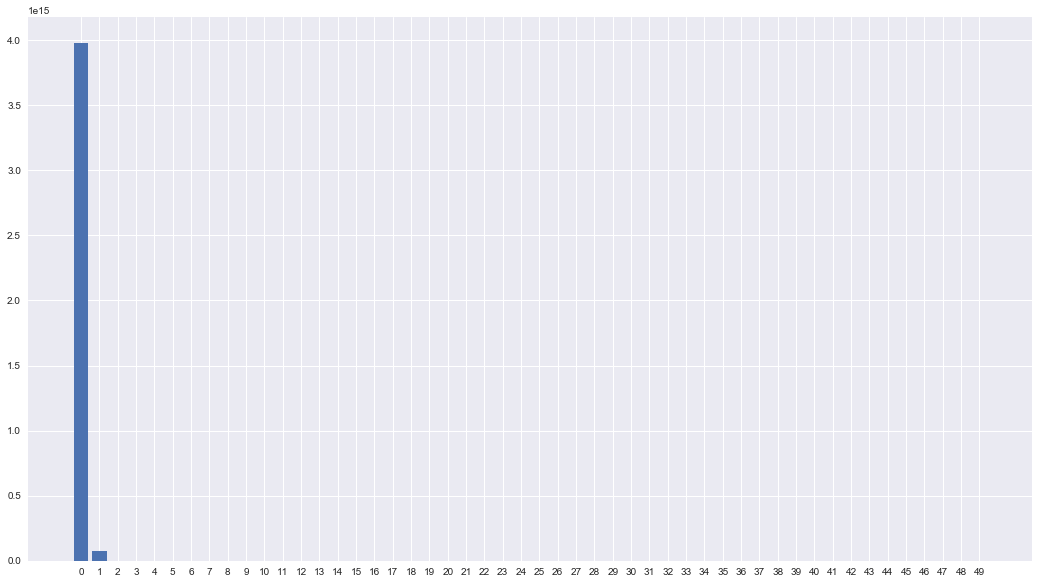

In [52]:
features = range(pca.n_components_)
plt.figure(figsize=(18,10))
plt.bar(features, pca.explained_variance_)
plt.xticks(features)

plt.show()

In [53]:
pca_features = pca.transform(cleaned_data)
pca_features.shape

(16814, 50)

In [54]:
pca_data = pd.DataFrame(pca_features)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-5.249506e+07,-1.248558e+07,-547.724518,-89.655621,-81.323652,198.762375,4.906881,-0.905540,2.361142,-2.061139,...,-0.003128,-0.018669,-0.005904,0.005666,0.010117,-0.014760,-0.000234,0.010945,-0.051896,-0.000404
1,-5.243752e+07,-1.247281e+07,437.210897,-62.738420,-113.906944,213.169066,-13.736035,4.765534,-0.885137,6.916707,...,-0.007488,-0.018885,-0.011295,0.013557,0.010253,-0.016558,-0.003502,0.012428,0.004539,-0.000440
2,-5.244043e+07,-1.246730e+07,-501.768069,-24.154316,-6.807738,-54.935665,-5.388929,-0.168191,8.680141,-4.608377,...,-0.002255,-0.003463,0.002048,0.003538,-0.002901,-0.004102,0.001892,0.003484,0.001055,-0.001006
3,-5.239886e+07,-1.246818e+07,167.419383,-3.305570,-29.329337,139.384551,-14.237066,2.024185,-1.123029,-3.762363,...,-0.001587,-0.023707,-0.008113,0.021027,0.003472,-0.009324,-0.005517,0.004818,0.015184,-0.000880
4,-5.237227e+07,-1.246934e+07,1262.169175,-64.632515,-128.050387,213.845507,-12.323644,6.563802,-0.049927,-3.046269,...,-0.004809,-0.010291,-0.002122,0.010583,0.012475,-0.005539,-0.001776,0.008696,-0.006124,-0.001048


In [56]:
from sklearn.cluster import KMeans
# Fit Kmeans and calculate SSE for each k value
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pca_data)
    sse[k] = kmeans.inertia_ # sum of squared distances to the closest cluster centers

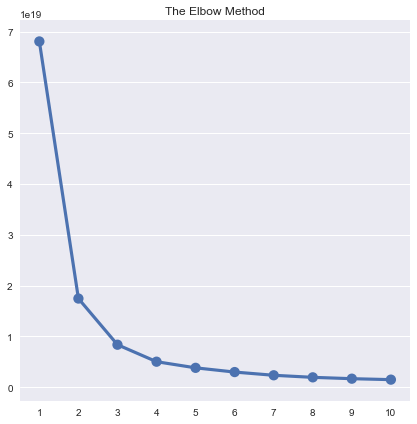

In [58]:
# plot SSE for each k
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()